## **YOLO**

Tutorial Link: https://www.youtube.com/watch?v=m9fH9OWn8YM

GitHub Repository: https://github.com/ultralytics/ultralytics

As previously mentioned, we will be utilizing the Airbus Aircraft database, which features high-resolution satellite images, each measuring 2560x2560 pixels.

However, according to the documentation on the YOLO library's GitHub page, the latest models in this library are not capable of processing images larger than 640 pixels. Consequently, in this section of our project, we have decided to divide the image in subimages, i.e., instead of having one picture of 2560x2560 there is gonna be 25 subimages of 512x512 pixels.

As we are using the YOLO files, we do not only need to make the image divisionwe also need to prepare the files for those subimages.

There are many versions of YOLO, but we will focus on YOLOv8, which are the latest versions offered. Additionally, within YOLOv8, there are several models that have been pre-trained for Detection, Segmentation, and Pose with different databases. Among the different databases used, it's worth highlighting COCO (Common Objects in Context), Open Image V7 (with Google Images), and ImageNet, each of which includes labeled images [6].
Focusing exclusively on YOLOv8 pre-trained with COCO, we need to choose a model size that is suitable for the problem at hand. The following table shows a summary of the main characteristics of the different models. Notable features include the pixel size that the model supports, params which is the number of parameters the model has in millions (a higher number of parameters can be more complex and effective, but slower), and lastly FLOPs (Floating Point Operations Per Second) representing the model's complexity.


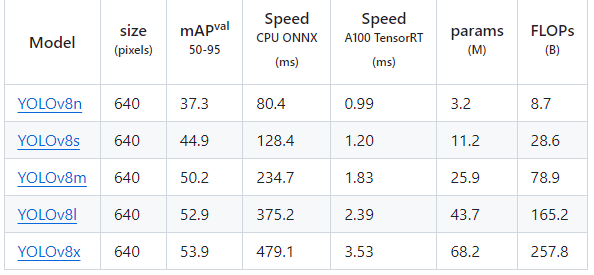

YOLO = You only see once

COCO = Common Objects in Context

# **Installation Libraries**

In [2]:
!pip install ultralytics


In [3]:
from PIL import Image
import os

# **Acces to Google Drive**

In [4]:
path = os.getcwd()

Se puede escoger el modelo con el que queremos entrenar el modelo

# **Train and Test Model**


In [5]:
from ultralytics import YOLO
import os

## Config file

For the model.train function of the library YOLO we need to give as an input the model we want to use, as well as, the config_file.

To verify that everything it is correct we are going to create a function that verifies if that configuration file exists or not, if not create it.

## Train and test the model

We need to select a YOLO model to train our data.

In this project we selected the yolov8n, as it had provided the best results to this data. There is the need to point it out, that this model is a pretrained model, hence, it will may probably improve the  model.

In [7]:
import torch

In [9]:
model = YOLO('yolov8n.pt')

In [ ]:
results = model.train(data = path+ 'Datasets/Airbus/Airbus.yaml', epochs = 10,  imgsz=512, save = True, val = True)


Ultralytics YOLOv8.2.14 🚀 Python-3.11.4 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-PCIE-40GB MIG 7g.40gb, 40326MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/jovyan/Carlos_Gonzalez/YOLO/Airbus/Airbus.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train52, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save

train: Scanning /home/jovyan/Carlos_Gonzalez/YOLO/Airbus/labels/train.cache... 2399 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2399/2399 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /home/jovyan/Carlos_Gonzalez/YOLO/Airbus/labels/valid.cache... 878 images, 249 backgrounds, 0 corrupt: 100%|██████████| 878/878 [00:00<?, ?it/s]


Plotting labels to runs/detect/train52/labels.jpg... 


In [13]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (2): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (5): MaxPool2d(kernel

In [ ]:
f1_curve_img = Image.open('/content/runs/detect/train/F1_curve.png')
PR_curve_img = Image.open('/content/runs/detect/train/PR_curve.png')

os.makedirs(path+'Results/image_dividing', exist_ok=True)

f1_curve_img.save(path+'Results/image_dividing/yolov8n_F1_curve.png')
PR_curve_img.save(path+'Results/image_dividing/yolov8n_PR_curve.png')

# display(f1_curve_img)
# display(PR_curve_img)

Once, the pretrained model is trained and tested, all of it will be saved in this local path. (In this case, as I am using Google Colab is it save in this Notebook, although if we want it we can export it)

In [ ]:
model = YOLO('yolov8s.pt') # Use a pretrained model
# Use the model
results = model.train(data = path+ 'archive/config_image_dividing.yaml', epochs = 10,  imgsz=512, save = True, val = True)

Ultralytics YOLOv8.0.237 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/Othercomputers/Mi portátil (1)/Erasmus/Ljubljana/Subjects/Artificial Intelligence Systems/AirbusAircraft/archive/config_image_dividing.yaml, epochs=10, time=None, patience=50, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embe

train: Scanning /content/drive/Othercomputers/Mi portátil (1)/Erasmus/Ljubljana/Subjects/Artificial Intelligence Systems/AirbusAircraft/archive/data_YOLO2_image_dividing/labels/train.cache... 1800 images, 1289 backgrounds, 0 corrupt: 100%|██████████| 2325/2325 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/Othercomputers/Mi portátil (1)/Erasmus/Ljubljana/Subjects/Artificial Intelligence Systems/AirbusAircraft/archive/data_YOLO2_image_dividing/labels/train.cache... 1800 images, 1289 backgrounds, 0 corrupt: 100%|██████████| 2325/2325 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.73G      1.578      2.667      1.475         11        512: 100%|██████████| 146/146 [01:21<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:23<00:00,  3.07it/s]


                   all       2325       2856       0.34      0.546      0.359      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.73G      1.595      1.892      1.504          9        512: 100%|██████████| 146/146 [00:44<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:22<00:00,  3.26it/s]


                   all       2325       2856      0.259      0.238      0.139     0.0566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.73G        1.6      1.767      1.513          4        512: 100%|██████████| 146/146 [00:44<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:23<00:00,  3.09it/s]


                   all       2325       2856      0.452      0.584      0.426      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.73G      1.519      1.727      1.441          1        512: 100%|██████████| 146/146 [00:41<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:24<00:00,  2.99it/s]


                   all       2325       2856      0.499      0.648      0.486      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.71G      1.499      1.729       1.43          4        512: 100%|██████████| 146/146 [00:40<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:24<00:00,  2.98it/s]

                   all       2325       2856      0.506       0.65      0.495      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.71G      1.438        1.5      1.403          5        512: 100%|██████████| 146/146 [00:42<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:22<00:00,  3.21it/s]


                   all       2325       2856      0.531      0.717      0.561      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.72G        1.4      1.398      1.363          6        512: 100%|██████████| 146/146 [00:42<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:21<00:00,  3.32it/s]

                   all       2325       2856      0.515      0.693       0.55      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.71G      1.342      1.328      1.334          3        512: 100%|██████████| 146/146 [00:42<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:22<00:00,  3.25it/s]


                   all       2325       2856      0.566      0.753      0.599      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.72G      1.327      1.303      1.327         10        512: 100%|██████████| 146/146 [00:41<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:24<00:00,  3.00it/s]


                   all       2325       2856      0.598       0.75      0.596      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.72G      1.274      1.254      1.276          6        512: 100%|██████████| 146/146 [00:42<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:23<00:00,  3.12it/s]

                   all       2325       2856      0.591      0.776      0.638      0.426



10 epochs completed in 0.201 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.237 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:25<00:00,  2.83it/s]


                   all       2325       2856      0.591      0.776      0.638      0.426
              Airplane       2325       1473      0.569      0.977      0.732      0.507
    Truncated_airplane       2325       1383      0.614      0.575      0.544      0.345
Speed: 0.2ms preprocess, 3.1ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/train


In [ ]:
f1_curve_img = Image.open('/content/runs/detect/train2/F1_curve.png')
PR_curve_img = Image.open('/content/runs/detect/train2/PR_curve.png')

os.makedirs(path+'Results/image_dividing', exist_ok=True)

f1_curve_img.save(path+'Results/image_dividing/yolov8s_F1_curve.png')
PR_curve_img.save(path+'Results/image_dividing/yolov8s_PR_curve.png')

# display(f1_curve_img)
# display(PR_curve_img)

As we have obtained the best results for yolov8s, we are going to try to improve it with 20 iterations.

In [ ]:
model = YOLO('yolov8s.pt') # Use a pretrained model
# Use the model
results = model.train(data = path+ 'archive/config_image_dividing.yaml', epochs = 20,  imgsz=512, save = True, val = True)

In [ ]:
f1_curve_img = Image.open('/content/runs/detect/train3/F1_curve.png')
PR_curve_img = Image.open('/content/runs/detect/train3/PR_curve.png')

os.makedirs(path+'Results/image_dividing', exist_ok=True)

f1_curve_img.save(path+'Results/image_dividing/yolov8s_F1_curve_20_iterations.png')
PR_curve_img.save(path+'Results/image_dividing/yolov8s_PR_curve_20_iterations.png')

# display(f1_curve_img)
# display(PR_curve_img)

In [ ]:
model = YOLO('yolov8m.pt') # Use a pretrained model
# Use the model
results = model.train(data = path+ 'archive/config_image_dividing.yaml', epochs = 10,  imgsz=512, save = True, val = True)

Ultralytics YOLOv8.0.237 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/Othercomputers/Mi portátil (1)/Erasmus/Ljubljana/Subjects/Artificial Intelligence Systems/AirbusAircraft/archive/config_image_dividing.yaml, epochs=10, time=None, patience=50, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, emb

train: Scanning /content/drive/Othercomputers/Mi portátil (1)/Erasmus/Ljubljana/Subjects/Artificial Intelligence Systems/AirbusAircraft/archive/data_YOLO2_image_dividing/labels/train.cache... 1800 images, 1289 backgrounds, 0 corrupt: 100%|██████████| 2325/2325 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/Othercomputers/Mi portátil (1)/Erasmus/Ljubljana/Subjects/Artificial Intelligence Systems/AirbusAircraft/archive/data_YOLO2_image_dividing/labels/train.cache... 1800 images, 1289 backgrounds, 0 corrupt: 100%|██████████| 2325/2325 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.74G      1.558      2.477      1.497         11        512: 100%|██████████| 146/146 [00:58<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:29<00:00,  2.51it/s]


                   all       2325       2856    0.00121      0.267   0.000765   0.000301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.87G       1.72      2.122      1.622          9        512: 100%|██████████| 146/146 [00:53<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:28<00:00,  2.59it/s]


                   all       2325       2856      0.578      0.369      0.334      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      5.03G      1.655      1.909       1.58          4        512: 100%|██████████| 146/146 [00:52<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:28<00:00,  2.52it/s]


                   all       2325       2856     0.0158      0.613     0.0148    0.00726

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.89G      1.605      1.901      1.518          1        512: 100%|██████████| 146/146 [00:53<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:27<00:00,  2.67it/s]

                   all       2325       2856      0.464      0.655      0.456      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      5.01G      1.522       1.83      1.459          4        512: 100%|██████████| 146/146 [00:52<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:27<00:00,  2.65it/s]

                   all       2325       2856      0.502      0.677      0.498      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.89G      1.462      1.577      1.452          5        512: 100%|██████████| 146/146 [00:51<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:27<00:00,  2.63it/s]

                   all       2325       2856      0.422       0.63      0.453      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      5.01G      1.434        1.5      1.409          6        512: 100%|██████████| 146/146 [00:51<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:27<00:00,  2.61it/s]

                   all       2325       2856      0.499      0.676      0.511      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.89G      1.389      1.401      1.371          3        512: 100%|██████████| 146/146 [00:52<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:26<00:00,  2.73it/s]

                   all       2325       2856      0.547      0.743      0.575      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.86G      1.351      1.381      1.356         10        512: 100%|██████████| 146/146 [00:52<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:26<00:00,  2.71it/s]

                   all       2325       2856      0.582      0.757      0.577       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.88G      1.284       1.31      1.304          6        512: 100%|██████████| 146/146 [00:51<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:27<00:00,  2.67it/s]

                   all       2325       2856      0.564      0.751      0.604      0.394



10 epochs completed in 0.256 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 52.0MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.0.237 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:29<00:00,  2.44it/s]


                   all       2325       2856      0.564      0.752      0.603      0.394
              Airplane       2325       1473      0.536      0.976      0.706      0.476
    Truncated_airplane       2325       1383      0.591      0.527      0.501      0.312
Speed: 0.2ms preprocess, 6.4ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train2


## If there is no Truncated Airplane?

We are to train the model onnly to detect Airplanes without differenciating between Airplanes and Truncated Airplanes

In [ ]:
path_data_store = 'data_YOLO2_image_dividing_only_airplanes'
name_classes = ['Airplane']
config_file(path+'archive','config_image_dividing_only_airplanes.yaml', path_data_store, name_classes)

['path: /content/drive/Othercomputers/Mi portátil (1)/Erasmus/Ljubljana/Subjects/Artificial Intelligence Systems/AirbusAircraft/archive/data_YOLO2_image_dividing_only_airplanes', '\ntrain: images/train', '\nval: images/train', '\nnames:\n  0: Airplane']


'/content/drive/Othercomputers/Mi portátil (1)/Erasmus/Ljubljana/Subjects/Artificial Intelligence Systems/AirbusAircraft/archive/config_image_dividing_only_airplanes.yaml'

In [ ]:
with open(path+"archive/config_image_dividing_only_airplanes.yaml", "r") as f:
    print(f.read())

path: /content/drive/Othercomputers/Mi portátil (1)/Erasmus/Ljubljana/Subjects/Artificial Intelligence Systems/AirbusAircraft/archive/data_YOLO2_image_dividing_only_airplanes
train: images/train
val: images/train
names:
  0: Airplane


In [ ]:
# Load the model
model = YOLO('yolov8n.pt')

# Use the model
results = model.train(data = path+ 'archive/config_image_dividing_only_airplanes.yaml', epochs = 10,  imgsz=512, save = True, val = True)

In [ ]:
f1_curve_img = Image.open('/content/runs/detect/train5/F1_curve.png')
PR_curve_img = Image.open('/content/runs/detect/train5/PR_curve.png')

os.makedirs(path+'Results/image_dividing_only_airplanes', exist_ok=True)

f1_curve_img.save(path+'Results/image_dividing_only_airplanes/yolov8m_F1_curve.png')
PR_curve_img.save(path+'Results/image_dividing_only_airplanes/yolov8m_PR_curve.png')

# display(f1_curve_img)
# display(PR_curve_img)

In [ ]:
# Load the model
model = YOLO('yolov8s.pt')

# Use the model
results = model.train(data = path+ 'archive/config_image_dividing_only_airplanes.yaml', epochs = 10,  imgsz=512, save = True, val = True)

In [ ]:
f1_curve_img = Image.open('/content/runs/detect/train5/F1_curve.png')
PR_curve_img = Image.open('/content/runs/detect/train5/PR_curve.png')

os.makedirs(path+'Results/image_dividing_only_airplanes', exist_ok=True)

f1_curve_img.save(path+'Results/image_dividing_only_airplanes/yolov8s_F1_curve.png')
PR_curve_img.save(path+'Results/image_dividing_only_airplanes/yolov8s_PR_curve.png')

# display(f1_curve_img)
# display(PR_curve_img)

As we have obtained the best results for yolov8s, we are going to try to improve it with 20 iterations.

In [ ]:
# Load the model
model = YOLO('yolov8s.pt')

# Use the model
results = model.train(data = path+ 'archive/config_image_dividing_only_airplanes.yaml', epochs = 20,  imgsz=512, save = True, val = True)

In [ ]:
f1_curve_img = Image.open('/content/runs/detect/train6/F1_curve.png')
PR_curve_img = Image.open('/content/runs/detect/train6/PR_curve.png')

os.makedirs(path+'Results/image_dividing_only_airplanes', exist_ok=True)

f1_curve_img.save(path+'Results/image_dividing_only_airplanes/yolov8s_F1_curve_20_epochs.png')
PR_curve_img.save(path+'Results/image_dividing_only_airplanes/yolov8s_PR_curve_20_epochs.png')

# display(f1_curve_img)
# display(PR_curve_img)